<a href="https://colab.research.google.com/github/opinner/Articles/blob/main/Articles/Unnecessary_artsy_ridge_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unnecessary artsy ridge maps

Create unnecessarily beautiful ridge maps of topography
(or height maps in general)

install the package all of this is based on

In [ ]:
!pip install pip install ridge_map

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for SRTM.py: filename=SRTM.py-0.3.7-py3-none-any.whl size=105846 sha256=1abd6a6c9c897611a1c3bbf77d4f3eae6521e13fab6cc92f9efd3bc4a475c6d7
  Stored in directory: /root/.cache/pip/wheels/86/8d/be/cafef7d5285bb6b4a7a42ba3fc72b6c9edccb0d02679acb8ea
Successfully built SRTM.py


In [ ]:
from ridge_map import RidgeMap
from ridge_map import FontManager

#the default font of the map is not available anymore. This is an alternative
font = FontManager('https://github.com/google/fonts/blob/main/ofl/uncialantiqua/UncialAntiqua-Regular.ttf?raw=true')

"""
def to_image_coords(coords,ridgemap):
  return ((coords[1] - ridgemap.longs[0])/(ridgemap.longs[1] - ridgemap.longs[0]),(coords[0] - ridgemap.lats[0])/(ridgemap.lats[1] - ridgemap.lats[0]))

def draw_POI(coords, label, color, axes = ridges, ridgemap = rm, ms = 6):

  axes.text(coords[0]+0.005, coords[1]+0.005, label,
              fontproperties=ridgemap.font,
              size=20,
              color=color,
              transform=axes.transAxes,
              verticalalignment="bottom",
              zorder=len(values)+10)

  axes.plot(*coords, 'o',
              color=color,
              transform=axes.transAxes,
              ms=ms,
              zorder= 1e10) #len(values)+10)

  return None
  """

In [ ]:
#Bounding Box copy-pasted from http://bboxfinder.com
#rm = RidgeMap((6.630249,50.483726,7.612152,51.021530), font=font.prop)
rm = RidgeMap((7.044983,50.635962,7.271919,50.774682), font=font.prop)
values = rm.get_elevation_data(num_lines=150, viewpoint="south")
values=rm.preprocess(
    values=values,
    lake_flatness=2,
    water_ntile=1,
    vertical_ratio=240)

Creating /root/.cache/srtm
4 2884802


    values : np.ndarray
        An array to process, or fetch the elevation data lazily here.
    water_ntile : float in [0, 100]
        Percentile below which to delete data. Useful for coasts or rivers.
        Set to 0 to not delete any data.
    lake_flatness : int
        How much the elevation can change within 3 squares to delete data.
        Higher values delete more data. Useful for rivers, lakes, oceans.
    vertical_ratio : float > 0
        How much to exaggerate hills. Kind of arbitrary. 40 is reasonable,
        but try bigger and smaller values!

<Axes: >

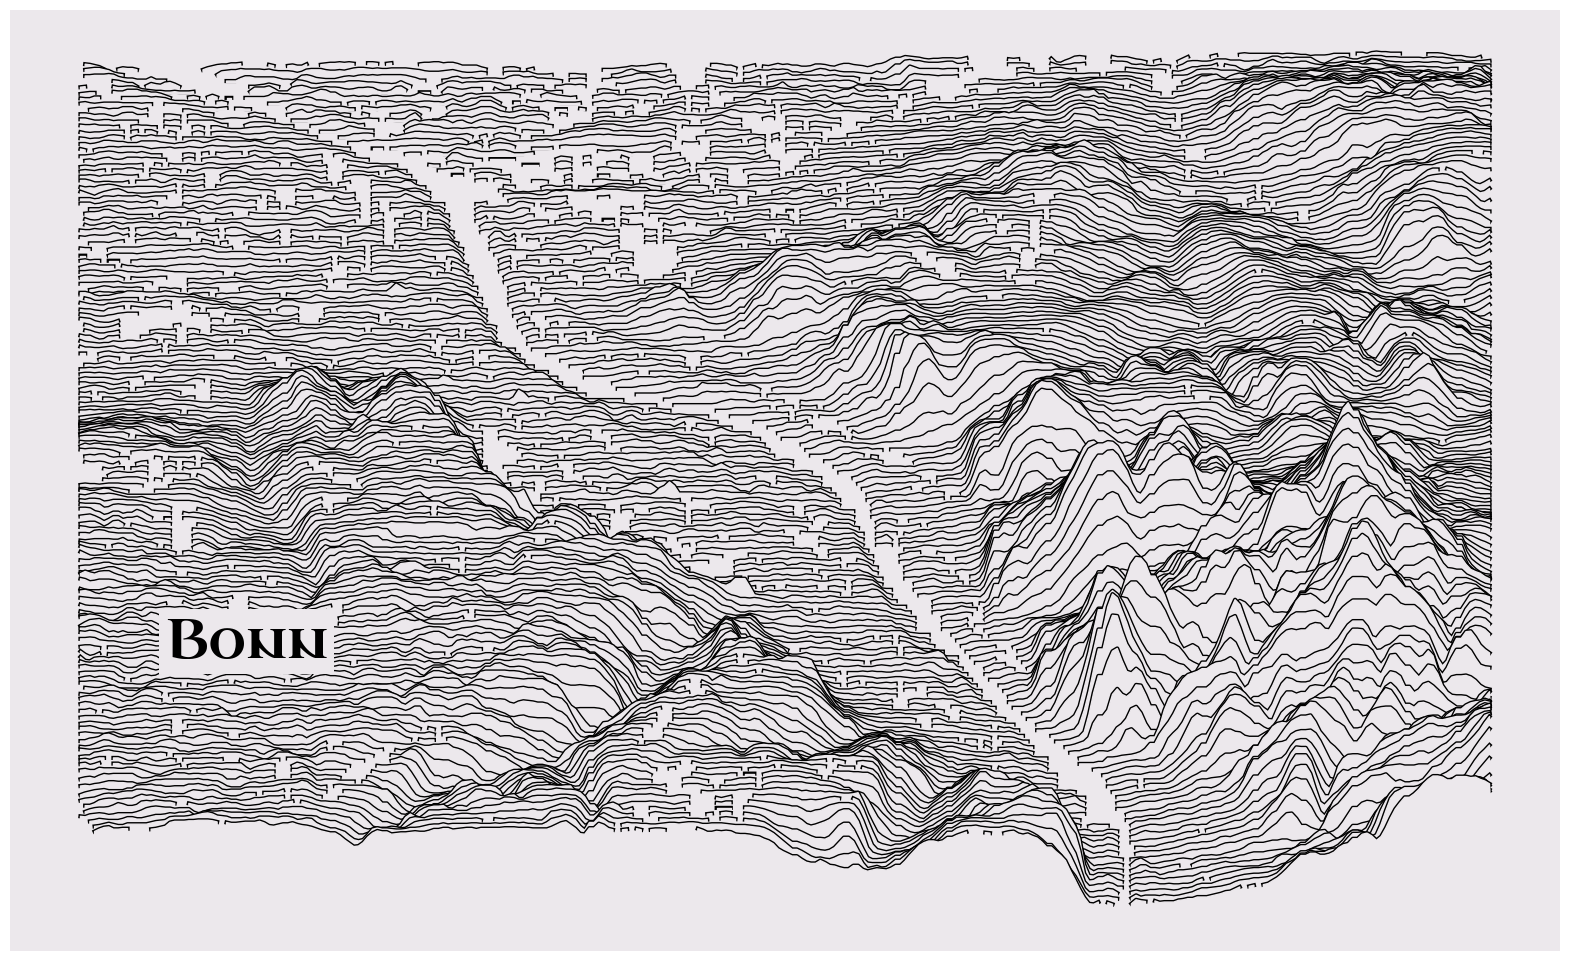

In [ ]:
rm.plot_map(values=values,
            label='Bonn',
            label_y=0.3,
            label_x=0.1,
            label_size=40,
            linewidth=3)

In [ ]:
Blankenberg = (50.76452979556927, 7.358703508965457)
Siegburg =(50.79594565893449, 7.211137502048945)
Bcoords = to_image_coords(Blankenberg, ridgemap = rm)
Scoords = to_image_coords(Siegburg, ridgemap = rm)

#draw_POI(coords = (Bcoords[1],Bcoords[0]), label = "Blankenberg", color = "tab:red")
#draw_POI(coords = to_image_coords(Siegburg, ridgemap = rm), label = "Siegburg", color = "tab:red")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

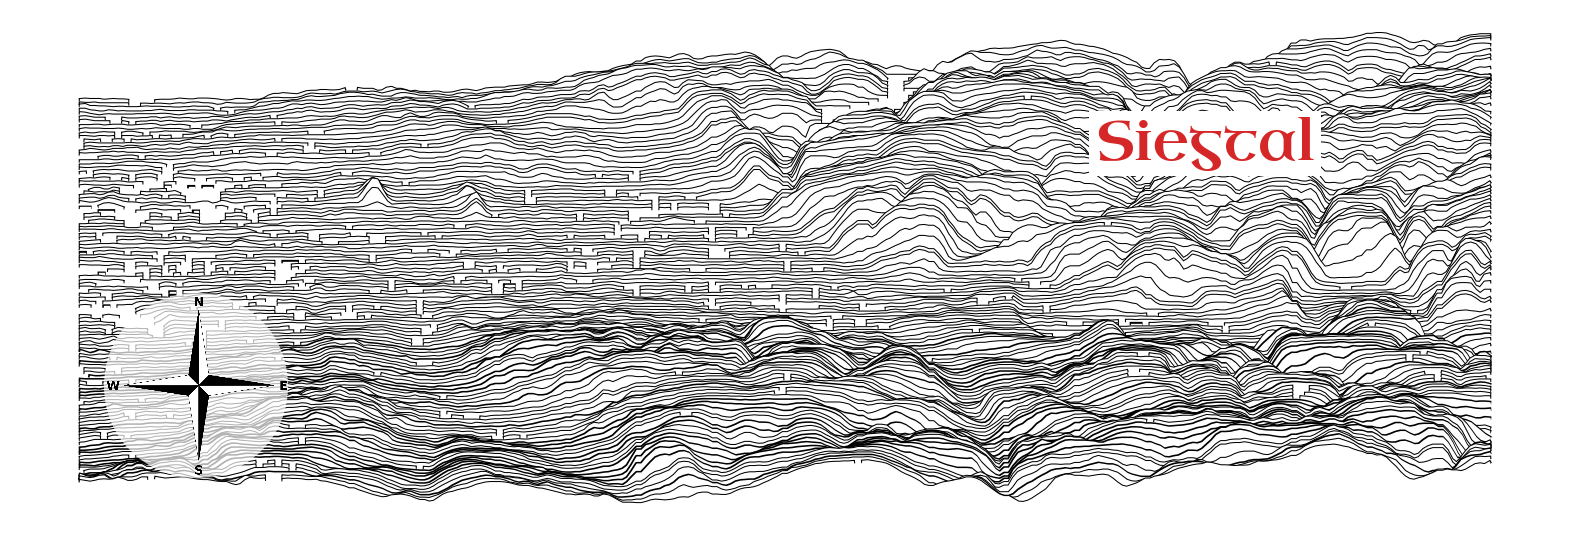

In [ ]:
#Bounding Box copy-pasted from http://bboxfinder.com
rm = RidgeMap((7.163086,50.734065,7.396889,50.815697), font=font.prop)
values = rm.get_elevation_data(num_lines=120)
values=rm.preprocess(
    values=values,
    lake_flatness=2,
    water_ntile=1,
    vertical_ratio=150)

ridges = rm.plot_map(values=values,
            label='Siegtal',
            label_y=0.7,
            label_x=0.7,
            label_size=40,
            linewidth=2.5,
            background_color="white",
)

# Bit of a hack to update the text label color
for child in ridges.get_children():
    if isinstance(child, matplotlib.text.Text) and 'Siegtal' in child._text:
        label_artist = child
        break
label_artist.set_color('tab:red')

"""
Bcoords = to_image_coords(Blankenberg, ridgemap = rm)
Bcoords = (Bcoords[0] + 0.03 , Bcoords[1] - 0.1)
ridges.text(Bcoords[0]+0.005, Bcoords[1]+0.005, 'Blankenberg',
            fontproperties=rm.font,
            size=20,
            color="tab:red",
            transform=ridges.transAxes,
            verticalalignment="bottom",
            zorder=len(values)+10,
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0')
)

ridges.plot(*Bcoords, 'o',
            color='tab:red',
            transform=ridges.transAxes,
            ms=6,
            zorder=len(values)+10)

Scoords = to_image_coords(Siegburg, ridgemap = rm)
Scoords = (Scoords[0] + 0.03 , Scoords[1] - 0.1)
ridges.text(Scoords[0]+0.005, Scoords[1]+0.005, 'Siegburg',
            fontproperties=rm.font,
            size=20,
            color="tab:red",
            transform=ridges.transAxes,
            verticalalignment="bottom",
            zorder=len(values)+10,
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0')
)

ridges.plot(*Scoords, 'o',
            color='tab:red',
            transform=ridges.transAxes,
            ms=6,
            zorder=len(values)+10)
""";

import PIL
import urllib
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Simple_compass_rose.svg/1024px-Simple_compass_rose.svg.png"
rose = np.array(PIL.Image.open(urllib.request.urlopen(url)))

from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)#The OffsetBox is a simple container artist.
#The child artists are meant to be drawn at a relative position to its #parent.
imagebox = OffsetImage(rose, zoom = 0.13)
#Container for the imagebox referring to a specific position *xy*.
ab = AnnotationBbox(imagebox, (0.12, 0.3), frameon = True, xycoords =ridges.transAxes, bboxprops= dict(facecolor='white', edgecolor='none', alpha = 0.7, boxstyle='circle,pad=0'), zorder = 200)
ridges.add_artist(ab)

# download figure from google colab
from google.colab import files
plt.gcf().savefig('Siegtal.png', dpi=600)
files.download('Siegtal.png')

In [ ]:
#Bounding Box copy-pasted from http://bboxfinder.com
rm = RidgeMap((7.048416,50.693848,7.371826,50.819384), font=font.prop)
values = rm.get_elevation_data(num_lines=150, viewpoint="east")
values=rm.preprocess(
    values=values,
    lake_flatness=2,
    water_ntile=2,
    vertical_ratio=200)

<class 'matplotlib.axes._axes.Axes'>


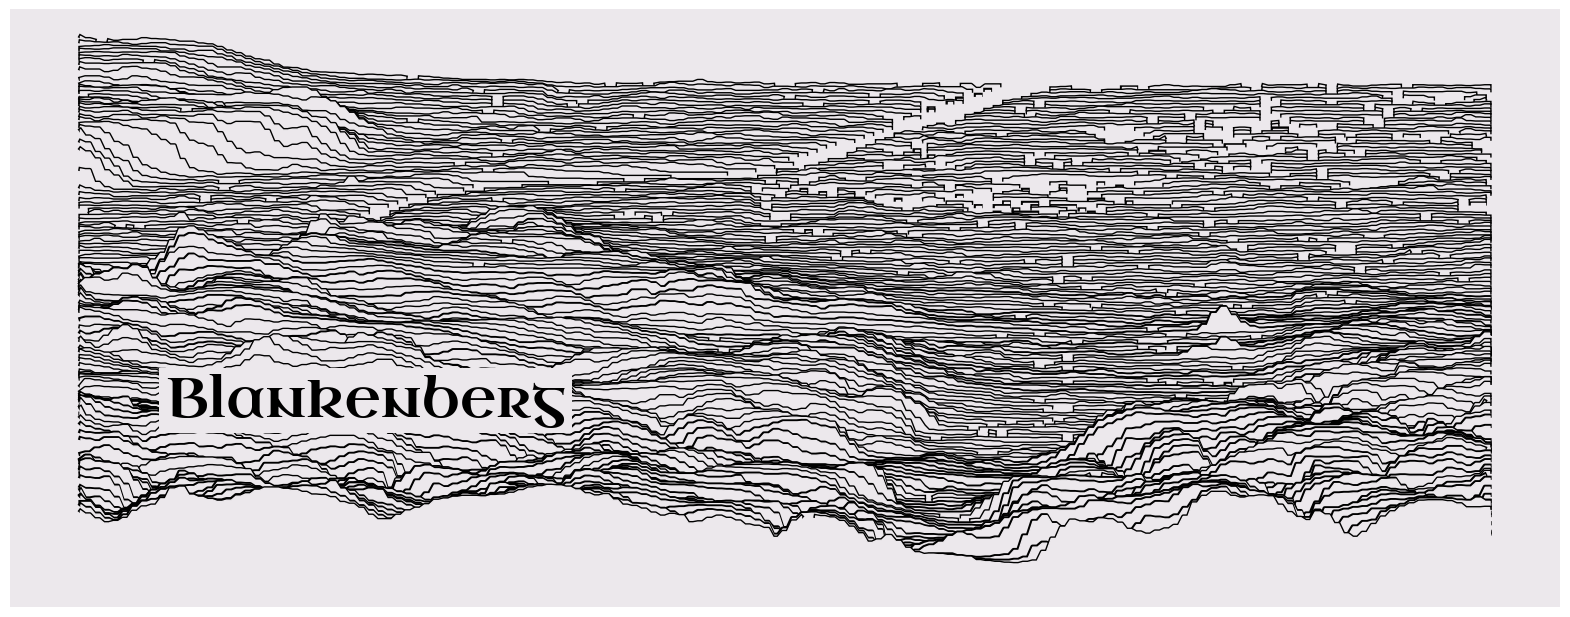

In [ ]:
ridges = rm.plot_map(values=values,
            label='Blankenberg',
            label_y=0.3,
            label_x=0.1,
            label_size=40,
            linewidth=3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

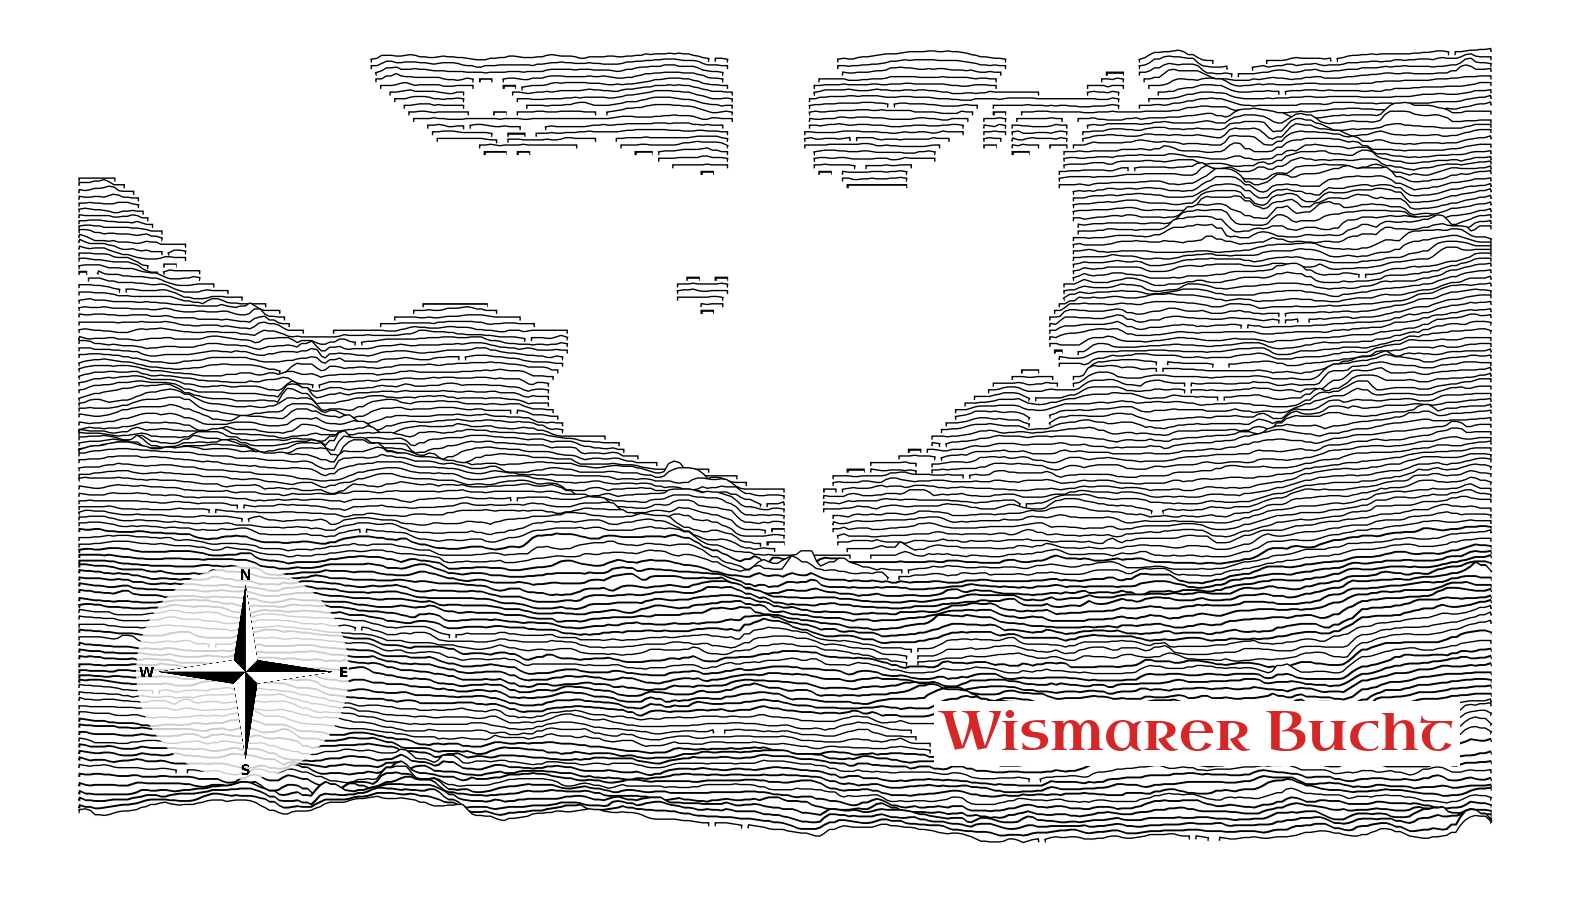

In [ ]:
#Bounding Box copy-pasted from http://bboxfinder.com
rm = RidgeMap((11.333771,53.856988,11.543884,53.977466), font=font.prop)
values = rm.get_elevation_data(num_lines=120)
values=rm.preprocess(
    values=values,
    lake_flatness=2,
    water_ntile=1,
    vertical_ratio=50)

ridges = rm.plot_map(values=values,
            label='Wismarer Bucht',
            label_y=0.15,
            label_x=0.6,
            label_size=40,
            linewidth=3,
            background_color="white",
)

# Bit of a hack to update the text label color
for child in ridges.get_children():
    if isinstance(child, matplotlib.text.Text) and 'Wismarer Bucht' in child._text:
        label_artist = child
        break
label_artist.set_color('tab:red')


import PIL
import urllib
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Simple_compass_rose.svg/1024px-Simple_compass_rose.svg.png"
rose = np.array(PIL.Image.open(urllib.request.urlopen(url)))

from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)#The OffsetBox is a simple container artist.
#The child artists are meant to be drawn at a relative position to its #parent.
imagebox = OffsetImage(rose, zoom = 0.15)
#Container for the imagebox referring to a specific position *xy*.
ab = AnnotationBbox(imagebox, (0.15, 0.25), frameon = True, xycoords =ridges.transAxes, bboxprops= dict(facecolor='white', edgecolor='none', alpha = 0.8, boxstyle='circle,pad=0'), zorder = 200)
ridges.add_artist(ab)

# download figure from google colab
from google.colab import files
plt.gcf().savefig('Wismar.png', dpi=600)
files.download('Wismar.png')